In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [34]:
# import cleaned merged data
data = pd.read_csv("Resources/data.csv")

## Primary Analysis

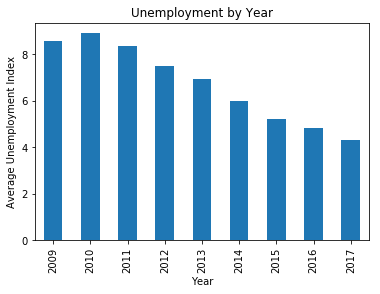

In [113]:
avgui = data.groupby(['State', 'Year']).sum().groupby('Year').mean() 
ax = avgui.reset_index().plot(x='Year', y='Avg UI', kind = 'bar', title = 'Unemployment by Year', legend = None)
ax.set_ylabel("Average Unemployment Index")
plt.savefig('plots/Average Unemployment Index.png', bbox_inches='tight')

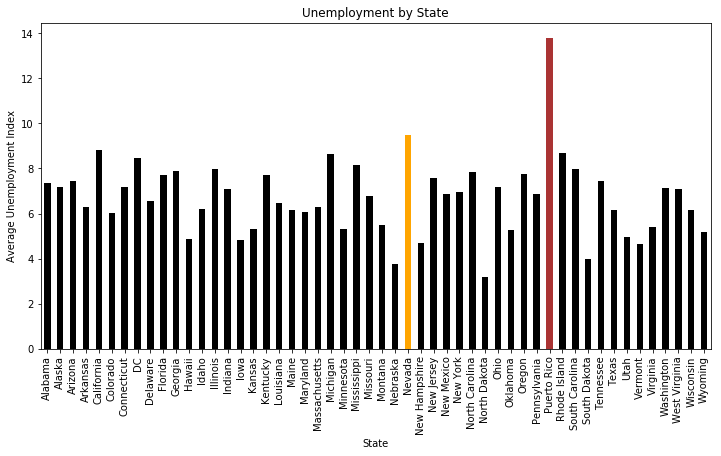

In [114]:
avguistate = data.groupby(['State', 'Year']).sum().groupby('State').mean() 
# avguistate = avguistate.reset_index()
#highlight the highest UI state
# highuistates = 'Puerto Rico'
pos1 = avguistate.index.get_loc('Puerto Rico')
pos2 = avguistate.index.get_loc('Nevada')

ax = avguistate.plot(y='Avg UI', kind = 'bar', title = 'Unemployment by State', 
                                figsize = (12,6), legend = None, color = 'black')

ax.patches[pos1].set_facecolor('#aa3333')
ax.patches[pos2].set_facecolor('orange')

ax.set_ylabel("Average Unemployment Index")
plt.savefig('plots/Average Unemployment Index by State.png', bbox_inches='tight')

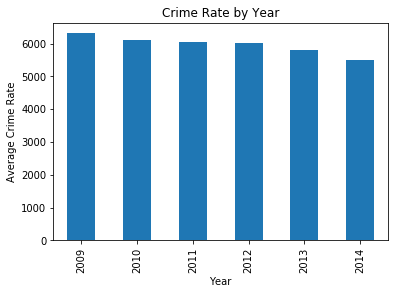

In [115]:
avgcrime = data.groupby(['State', 'Year']).sum().groupby('Year').mean() 
avgcrime = avgcrime.replace({"Total Crime Rate"==0:None})
avgcrime = avgcrime.dropna()
ax = avgcrime.reset_index().plot(x='Year', y="Total Crime Rate", kind = 'bar', title = 'Crime Rate by Year', legend = None)

ax.set_ylabel("Average Crime Rate")
plt.savefig('plots/Average Crime Rate.png', bbox_inches='tight')

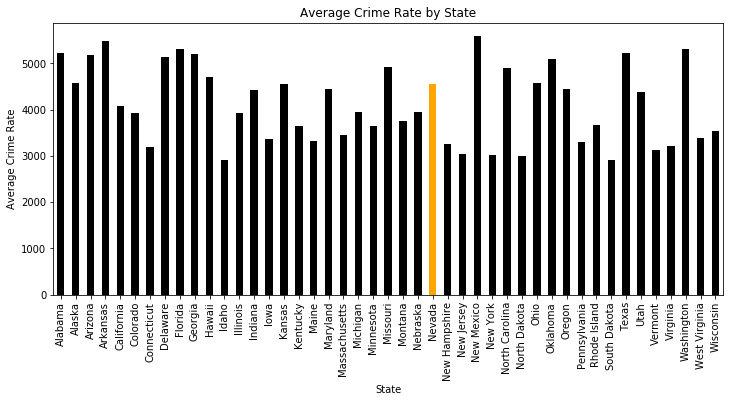

In [116]:
avgcrimestate = data.groupby(['State', 'Year']).sum().groupby('State').mean() 
avgcrimestate = avgcrimestate.replace({"Total Crime Rate"==0:None})
avgcrimestate = avgcrimestate.dropna()
ax = avgcrimestate.plot(y='Total Crime Rate', kind = 'bar', title = 'Average Crime Rate by State', 
                                   figsize = (12,5), legend = None, color = 'black')
#highlight the highest UI state
pos = avgcrimestate.index.get_loc('Nevada')
ax.patches[pos].set_facecolor('orange')

ax.set_ylabel("Average Crime Rate")
plt.savefig('plots/Average Crime Rate by State.png', bbox_inches='tight')

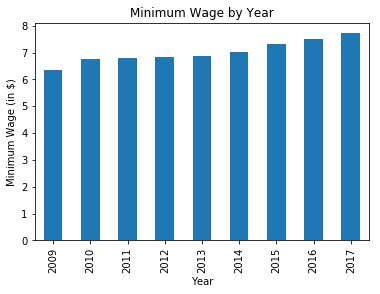

In [117]:
avgmwage = data.groupby(['State', 'Year']).sum().groupby('Year').mean() 
ax = avgmwage.reset_index().plot(x='Year', y="High.Value", kind = 'bar', title = 'Minimum Wage by Year', legend = None)
ax.set_ylabel("Minimum Wage (in $)")
plt.savefig('plots/Average Minimum Wage.png', bbox_inches='tight')

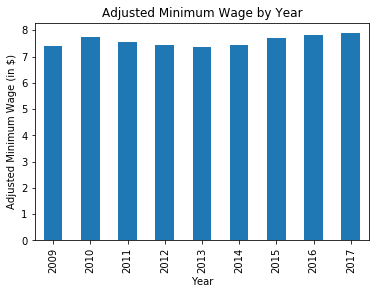

In [118]:
ax = avgmwage.reset_index().plot(x='Year', y="High.2018", kind = 'bar', title = 'Adjusted Minimum Wage by Year', legend = None)
ax.set_ylabel("Adjusted Minimum Wage (in $)")
plt.savefig('plots/Average Adjusted Minimum Wage.png', bbox_inches='tight')

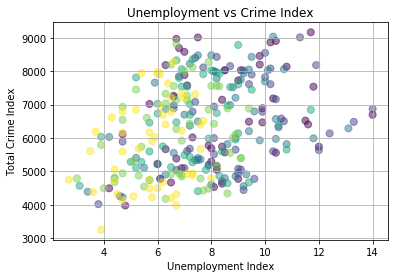

In [119]:
# plot Unemployment Index and Total crime Index 
x_axis = data["Avg UI"]
crime_rate = data["Total Crime Rate"]
plt.xlabel("Unemployment Index")
plt.ylabel("Total Crime Index")
plt.title("Unemployment vs Crime Index")

c = data["Year"]
plt.grid()
plt.scatter(x_axis, crime_rate, marker="o", c=c, s=50, alpha=0.5)
plt.savefig("plots/Unemployment and Crime index.png", bbox_inches='tight')

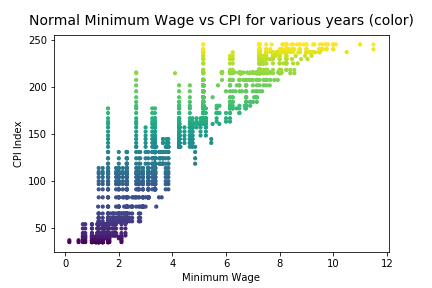

In [30]:
Image("plots/Actual Min wage with CPI.png")

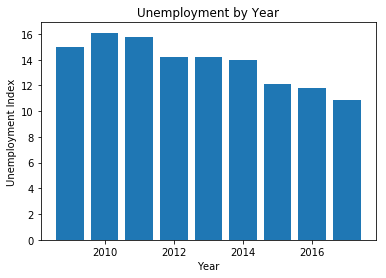

In [120]:
# plot bar of year vs unemployment 

plt.bar(data["Year"], data["Avg UI"],)
plt.title("Unemployment by Year")
plt.xlabel("Year")
plt.ylabel("Unemployment Index")
plt.savefig("plots/Unemployment by year.png", bbox_inches='tight')

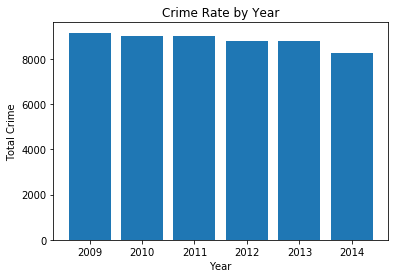

In [121]:
# plot a bar chart of year and crime index

plt.bar(data["Year"], data["Total Crime Rate"],)
plt.title("Crime Rate by Year")
plt.xlabel("Year")
plt.ylabel("Total Crime")
plt.savefig("plots/Crime Rate by Year.png", bbox_inches='tight')

## Changing the data to group in bins

In [7]:
data1 = data.replace({"Avg UI":0},None)
data1 = data1.dropna()

In [8]:
#Pivoted tables to find %age change
average_UI = data1.pivot(index= 'Year', columns = 'State', values = 'Avg UI')
crimerate = data1.pivot(index= 'Year', columns = 'State', values = 'Total Crime Rate')
adjusted_minwage = data1.pivot(index= 'Year', columns = 'State', values = 'High.2018')

In [9]:
# Percentage change in crime with respect to 2009 (earliest year being used
crimeratechange =  (crimerate/crimerate.iloc[0]) * 100
crimedrop = pd.DataFrame(crimeratechange.iloc[5,:])
crimedrop = crimedrop.round(2)
# crimedrop.sort_values(by=2014, kind = 'quicksort')
# #Binning of data in 5 quinitiles
# statebin= pd.qcut(crimeratechange.iloc[5,], 5, labels=["Very High", "High", "Medium", "Low", "Very Low"])

In [10]:
#Binning of data in 3 quinitiles
statebin= pd.qcut(crimeratechange.iloc[5,], 3, labels=["High", "Medium", "Low"])

#storing bin as DF to merge it with existing data and renaming columns
statebin= pd.DataFrame(statebin)
binneddata = data1.merge(statebin, how="inner", on = "State", left_index = False)
binneddata = pd.DataFrame.rename(binneddata, columns={2014:"Bins", "High.2018":"Adj Min Wage"})
binneddata.drop(columns= "Unnamed: 0", inplace = True)

#Using binned groups for creating those plots
binned = binneddata.groupby(["Bins"])

In [11]:
# Preview Data
binned.head(1)
#looks good

,State,Year,Avg UI,High.Value,Low.Value,CPI.Average,Adj Min Wage,Low.2018,Total Crime Rate,Bins
0,Alabama,2009,9.8,7.25,7.25,214.537,8.46,8.46,8460.9,Medium
6,Alaska,2009,8.4,7.15,7.15,214.537,8.35,8.35,7147.5,Low
36,Connecticut,2009,8.0,8.00,8.00,214.537,9.34,9.34,5298.6,High


<Figure size 432x288 with 0 Axes>

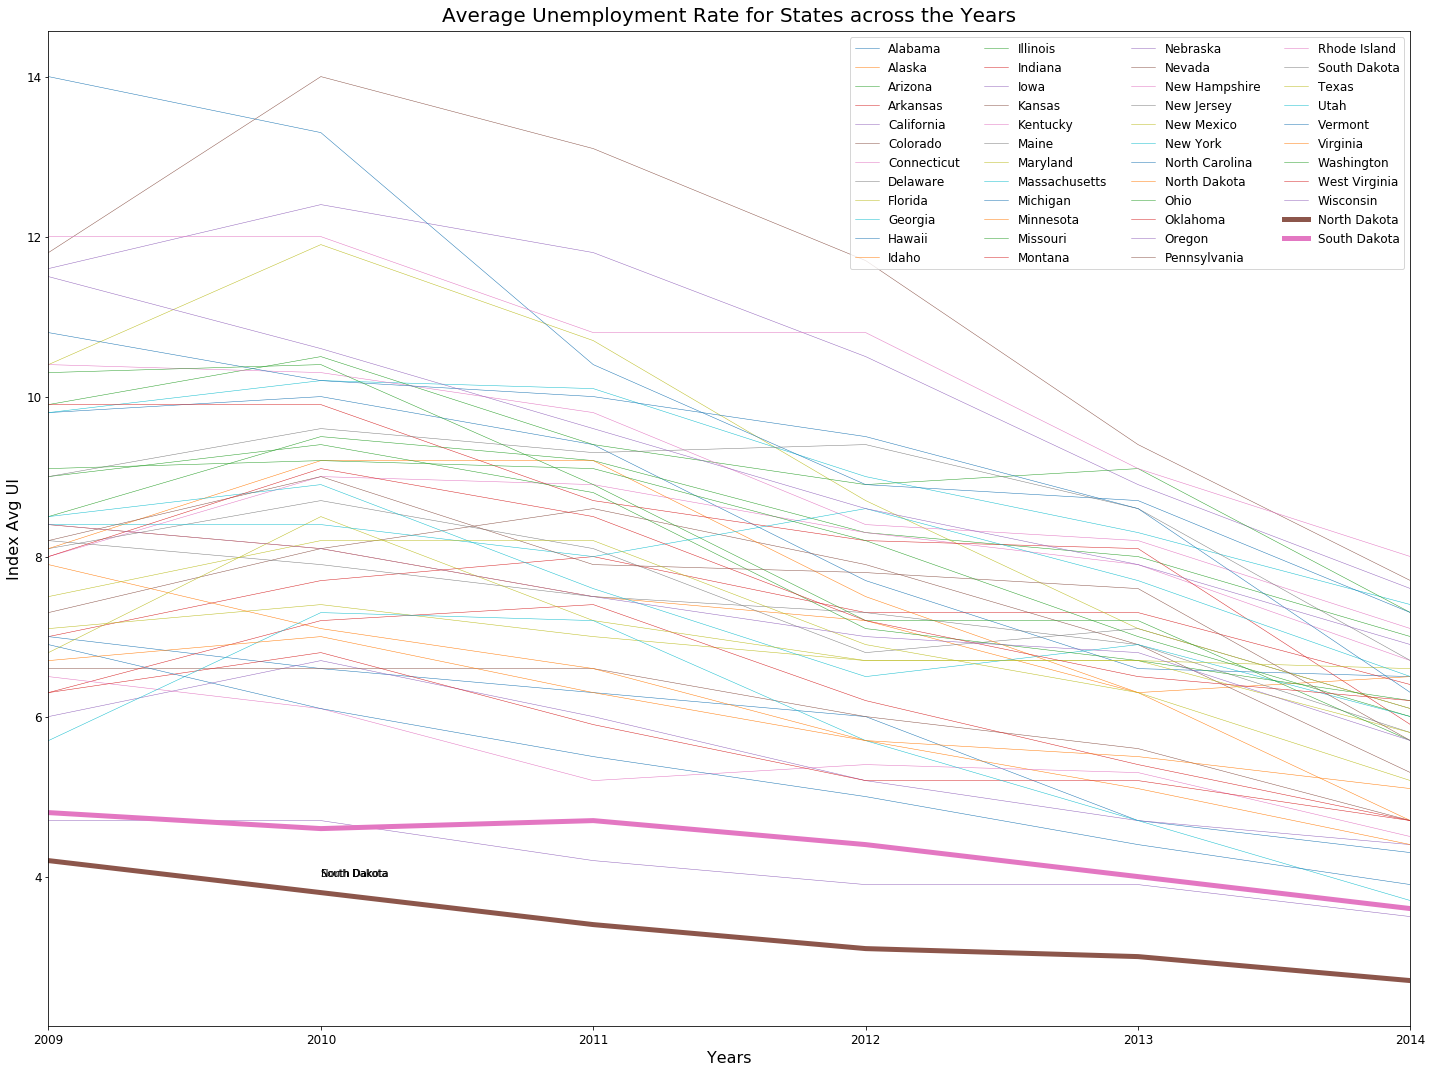

In [126]:
#Plotting all States for UI - spaghetting map
fig = plt.figure()
fig, ax = plt.subplots()

for State, grp in binneddata.groupby(['State']):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, figsize = (20, 15),linewidth = .5)

positivecrimestates = ['South Dakota', 'North Dakota']
crimeup = binneddata[binneddata["State"].isin(positivecrimestates)]

for State, grp in crimeup.groupby(['State']):
    ax1 = grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, figsize = (20, 15),linewidth = 5, fontsize = 12)
    ax1.annotate(s=State, xy =(2010,4))


ax.set_xlabel('Years', fontsize = 16)
ax.set_ylabel('Index Avg UI', fontsize = 16)
ax.set_title("Average Unemployment Rate for States across the Years", fontsize = 20, pad = 10)
plt.tight_layout()
plt.legend(loc='best', ncol = 4, fontsize = 12)
plt.savefig("plots/UI_States.png", bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

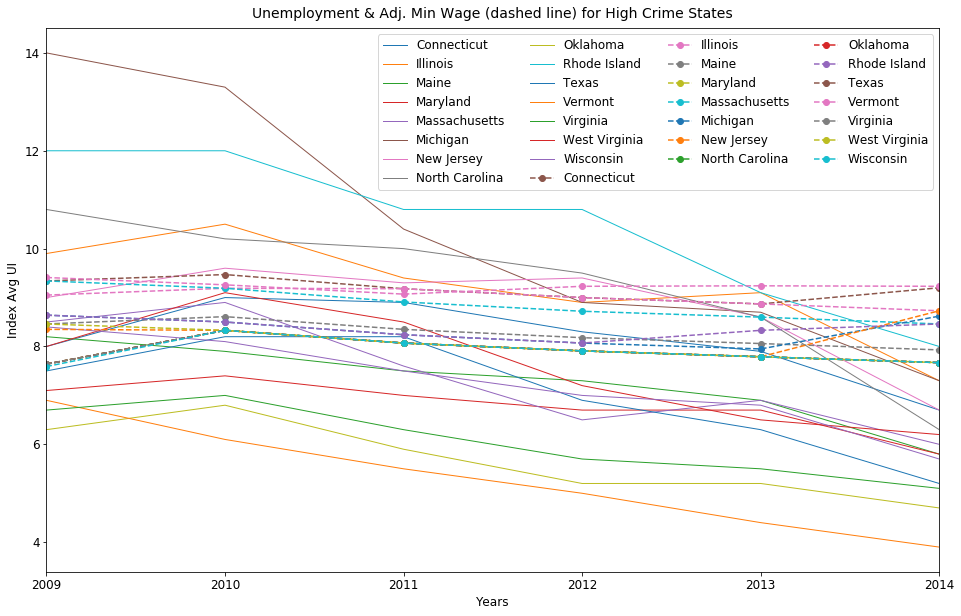

In [127]:
#Plots for High Crime Rate states 
fig = plt.figure()
fig, ax = plt.subplots()

for State, grp in binned.get_group('High').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, 
                  figsize = (16, 10), fontsize = 12 , linewidth = 1)

for State, grp in binned.get_group('High').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Adj Min Wage', label=State, 
                  figsize = (16, 10), fontsize = 12, marker='o', linestyle='dashed', linewidth = 1.5 )
# plt.legend(None)
ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('Index Avg UI', fontsize = 12)
ax.set_title("Unemployment & Adj. Min Wage (dashed line) for High Crime States", fontsize = 14, pad=10)
plt.legend(loc='best', ncol = 4, fontsize = 12)
plt.savefig("plots/UI_wage_States_High.png",  bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

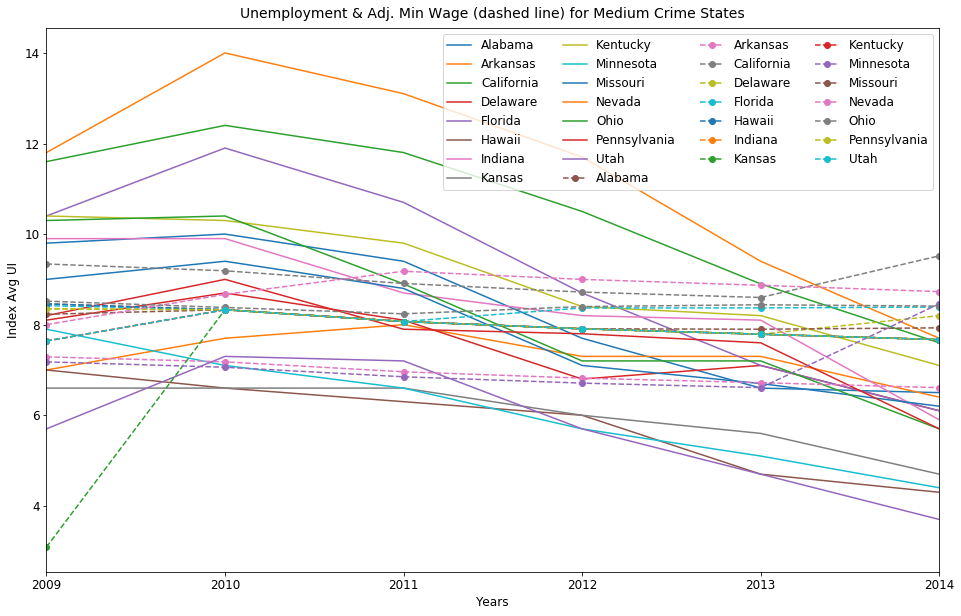

In [128]:
#Plots for Medium Crime Rate states 
fig = plt.figure()
fig, ax = plt.subplots()

for State, grp in binned.get_group('Medium').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, 
                  figsize = (16, 10), fontsize = 12 )

for State, grp in binned.get_group('Medium').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Adj Min Wage', label=State, 
                  figsize = (16, 10), fontsize = 12, marker='o', linestyle='dashed' )

ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('Index Avg UI', fontsize = 12)
ax.set_title("Unemployment & Adj. Min Wage (dashed line) for Medium Crime States", fontsize = 14, pad=10)
plt.legend(loc='best', ncol = 4, fontsize = 12)
plt.savefig("plots/UI_wage_States_Medium.png",  bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

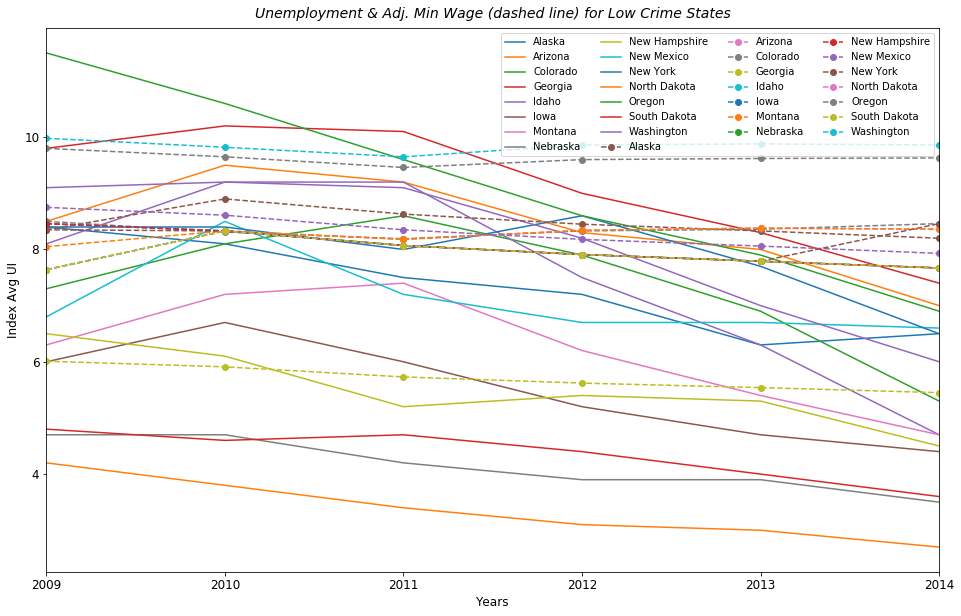

In [129]:
#Plots for Low Crime Rate states 
fig = plt.figure()
fig, ax = plt.subplots()

for State, grp in binned.get_group('Low').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, 
                  figsize = (16, 10), fontsize = 12 )

for State, grp in binned.get_group('Low').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Adj Min Wage', label=State, 
                  figsize = (16, 10), fontsize = 12, marker='o', linestyle='dashed' )
# plt.legend(None)
ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('Index Avg UI', fontsize = 12)
ax.set_title("Unemployment & Adj. Min Wage (dashed line) for Low Crime States", fontsize = 14, pad=10, style='italic')
# ax.annotate(s = State, xy=(2010,8))
plt.legend(loc='best', ncol = 4, fontsize = 10)
plt.savefig("plots/UI_wage_States_Low.png",  bbox_inches = 'tight')

C:\Users\skq1922\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


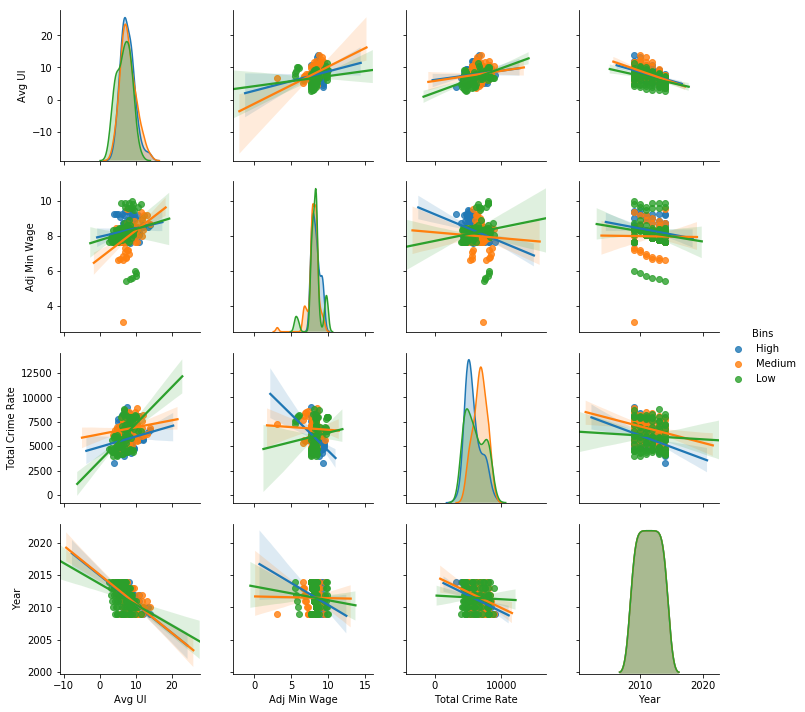

In [16]:
import seaborn as sns
sns.pairplot(binneddata, vars= ["Avg UI", "Adj Min Wage", "Total Crime Rate", "Year"], kind = "reg", hue = "Bins", palette=None)

plt.savefig("plots/pairedrelationbinned.png")

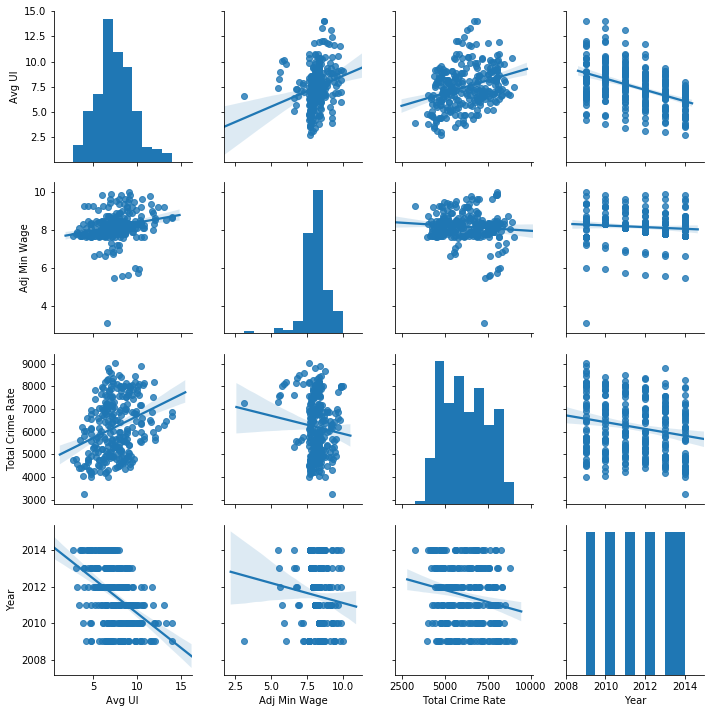

In [17]:
sns.pairplot(binneddata, vars= ["Avg UI", "Adj Min Wage", "Total Crime Rate", "Year"], kind = "reg")#, hue = "Bins", palette=None)

plt.savefig("plots/pairedrelation.png")

In [18]:
#Checking overall correlation in numbers
corr = binneddata.corr()
corr.style.background_gradient(cmap='coolwarm', axis = None).set_precision(2)

,Year,Avg UI,High.Value,Low.Value,CPI.Average,Adj Min Wage,Low.2018,Total Crime Rate
Year,1,-0.46,0.26,0.16,0.99,-0.098,-0.054,-0.2
Avg UI,-0.46,1,0.054,0.13,-0.45,0.23,0.23,0.31
High.Value,0.26,0.054,1,0.64,0.26,0.93,0.59,-0.16
Low.Value,0.16,0.13,0.64,1,0.16,0.6,0.98,-0.18
CPI.Average,0.99,-0.45,0.26,0.16,1,-0.1,-0.058,-0.19
Adj Min Wage,-0.098,0.23,0.93,0.6,-0.1,1,0.63,-0.095
Low.2018,-0.054,0.23,0.59,0.98,-0.058,0.63,1,-0.14
Total Crime Rate,-0.2,0.31,-0.16,-0.18,-0.19,-0.095,-0.14,1


C:\Users\skq1922\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


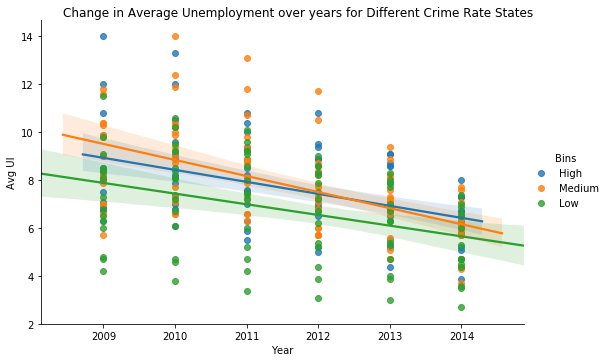

In [19]:
#Checking if there is a relation of Avg UI with Crime Rate states
ax = sns.lmplot(x = "Year", y="Avg UI",
            hue="Bins", aspect=1.5, #kind="swarm",(argument for catplot)
            data=binneddata, fit_reg=True, robust=True)
ax.fig.suptitle("Change in Average Unemployment over years for Different Crime Rate States", va = 'center')
plt.savefig("plots/Avg UI_binned_fit.png")

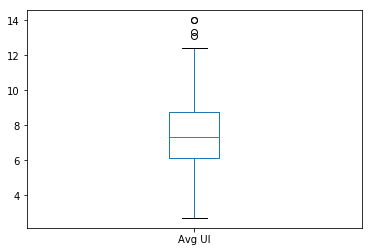

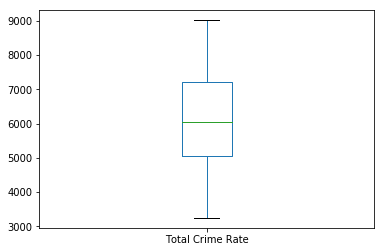

In [147]:
from scipy import stats

check = binneddata[binneddata['Year']<2015]
check
# # # check.sort_values('Avg UI')
binneddata[['Avg UI']].plot(kind='box')
# binneddata['High.Value'].plot(kind='box')
# binneddata[['High.2018']].plot(kind='box')
check[['Total Crime Rate']].plot(kind='box')
# check.columns
# # This saves the plot as a png file
plt.savefig('boxplot_outliers.png')

#### While the plots suggest that there is a good coorelation between Total Crime Rate and Avg UI, we can not conduct t-test because of the outlier issue, negating the test results.

In [21]:
# sample1 = check.sample(frac = .2)
# sample2 = check.sample(frac = .2)
# import scipy.stats as stats

# stats.ttest_ind(a= sample1,
#                 b= sample2,
#                 equal_var=False)  

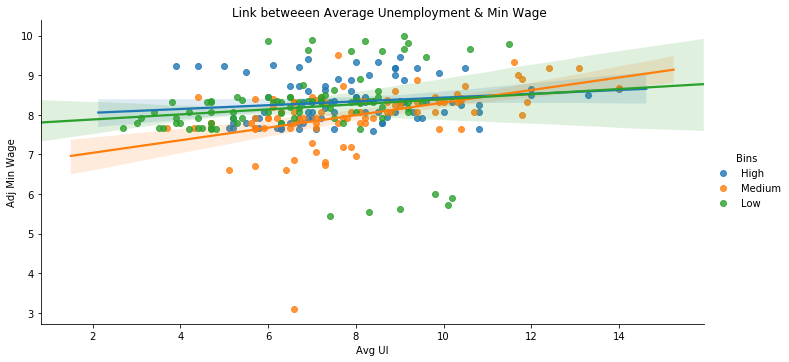

In [22]:
#Checking if there is a relation of Avg UI & Min Wage with Crime Rate states
ax = sns.lmplot(x="Avg UI", y="Adj Min Wage",
#             col="Year", kind="swarm", (for catplot arguments)
            hue="Bins", aspect=2,
            data=binneddata)
ax.fig.suptitle("Link betweeen Average Unemployment & Min Wage", va = 'center')
plt.savefig("plots/Yearflow_UI_wage_binned.png")

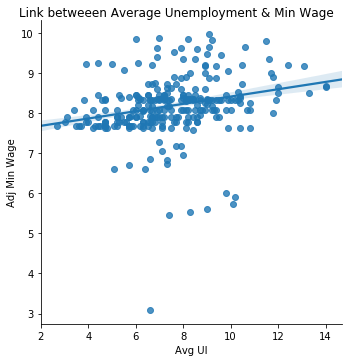

In [23]:
#Checking if there is a relation of Avg UI & Min Wage without Crime Rate states' distinction
ax = sns.lmplot(x="Avg UI", y="Adj Min Wage",aspect=1,
#             col="Year", kind="swarm", (for catplot arguments)hue="Bins", 
            data=binneddata, robust = True)
ax.fig.suptitle("Link betweeen Average Unemployment & Min Wage", va = 'center', ha='center')
plt.savefig("plots/Yearflow_UI_wage.png")
plt.tight_layout()

In [24]:
# import statsmodels.formula.api as sm

# # Note that this model is not the plot displayed above: it is one
# # joined model for male and female, not separate models for male and
# # female. The reason is that a single model enables statistical testing
# result = sm.ols(formula="'Total Crime Rate' ~ 'Avg UI' + 'Adj Min Wage'", data=binneddata).fit()
# print(result.summary())

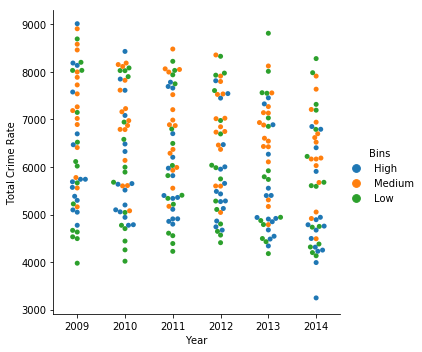

In [25]:
sns.catplot(x="Year", y="Total Crime Rate", data=binneddata[binneddata["Year"]<2015], legend = True, kind = "swarm", hue = "Bins")
plt.savefig('plots/Crime Rate Over years.png')
plt.set_title = "Crime Rate Over years"

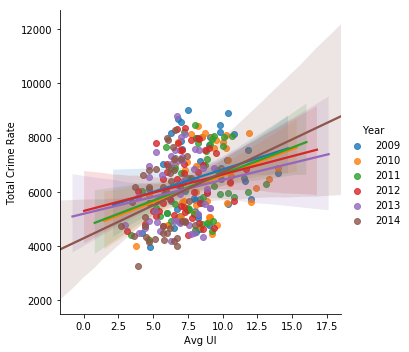

In [26]:
sns.lmplot(x="Avg UI", y="Total Crime Rate", data=binneddata[binneddata["Year"]<2015], legend = True, hue = "Year")
#            kind = "swarm", hue = "Year")
plt.savefig('plots/AvgUICrime.png')
plt.set_title = "Crime Rate Over years"

In [27]:
Bins = ['High', 'Medium', 'Low']

# Generate random data
state_crime = np.random.choice(a= Bins,
                              p = [0.25, 0.25 ,0.5],
                              size=10)
